In [2]:
#pip install prophet


  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 939.4 kB/s eta 0:00:15
   ---------------------------------------- 0.1/13.3 MB 950.9 kB/s eta 0:00:14
    --------------------------------------- 0.2/13.3 MB 700.2 kB/s eta 0:00:19
    --------------------------------------- 0.3/13.3 MB 1.1 MB/s eta 0:00:12
    --------------------------------------- 0.3/13.3 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.5/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.6/13.3 MB 1.5 MB/s eta 0:00:09
   - -------------------------------------- 0.6/13.3 MB 1.5 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/13.3 MB 1.6 MB/s eta 0:00:08
   -- ---------

In [4]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [5]:
df_test=pd.read_csv("DailyDelhiClimateTest.csv")
df_train=pd.read_csv("DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [7]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


# Uni-Variate Forecasting

In [9]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])


In [10]:
model = Prophet() #instantiate Prophet
model.fit(df_train)

16:17:59 - cmdstanpy - INFO - Chain [1] start processing
16:17:59 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''


future_data = model.make_future_dataframe(periods=113, freq = 'D')

forecast_data = model.predict(future_data)
  
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550271,3.423908,3.669963
1571,2017-04-21,3.554038,3.431811,3.678759
1572,2017-04-22,3.554314,3.430493,3.682202
1573,2017-04-23,3.553681,3.428768,3.678078
1574,2017-04-24,3.570943,3.445556,3.694412


In [16]:
forecast_data_col=forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(113)

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


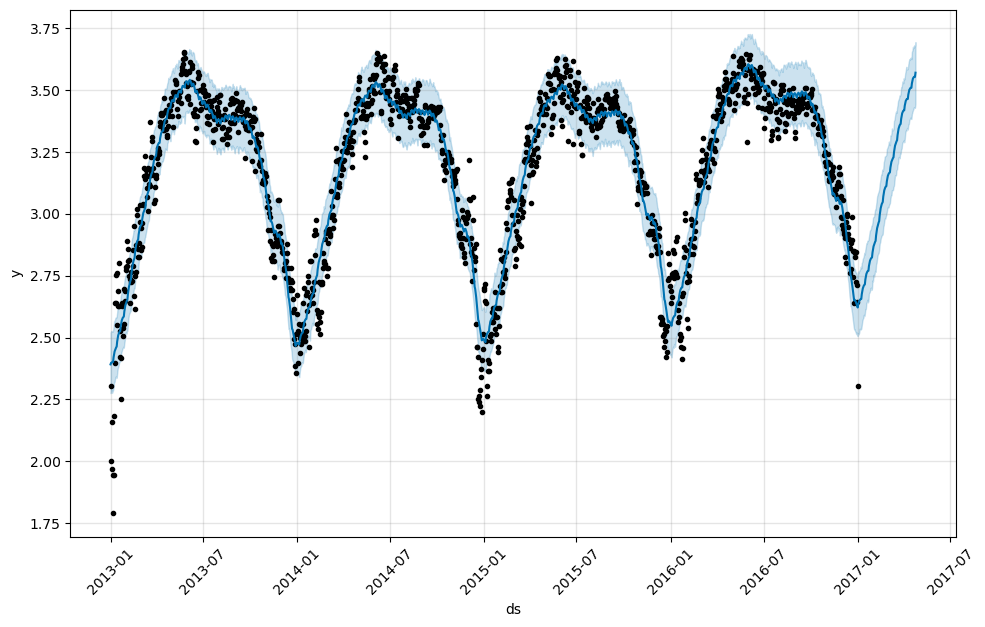

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = model.plot(forecast_data)

# Get the current axis
ax = fig.gca()

# Set the date format on the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optionally, you can rotate the date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

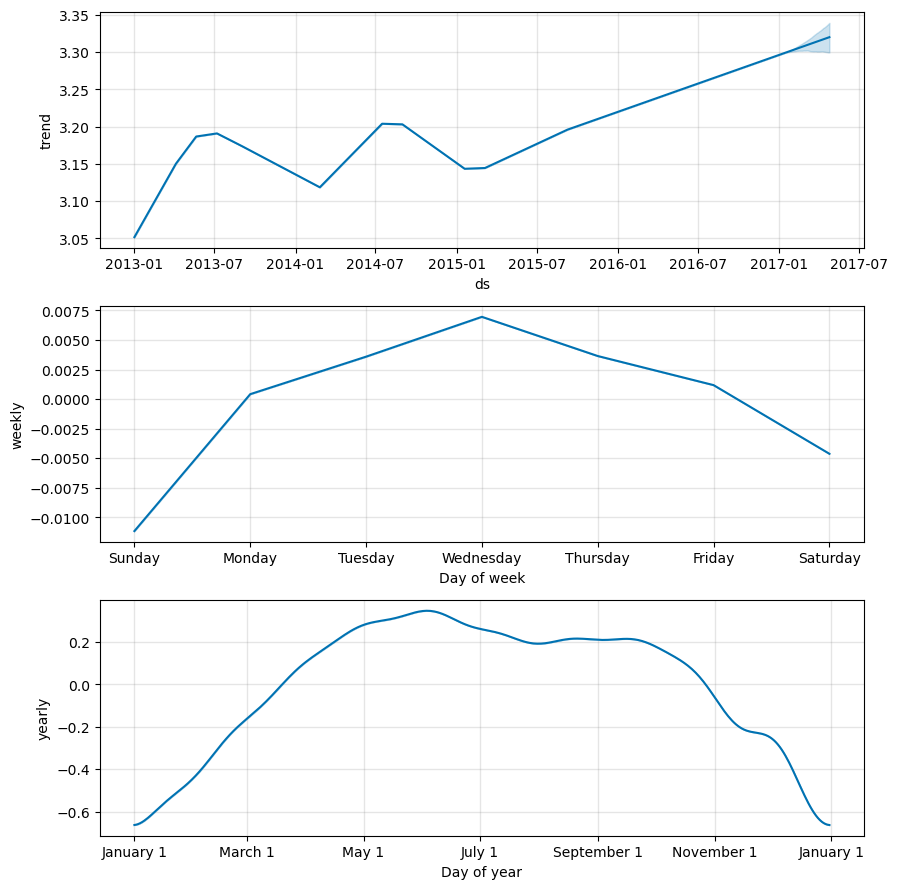

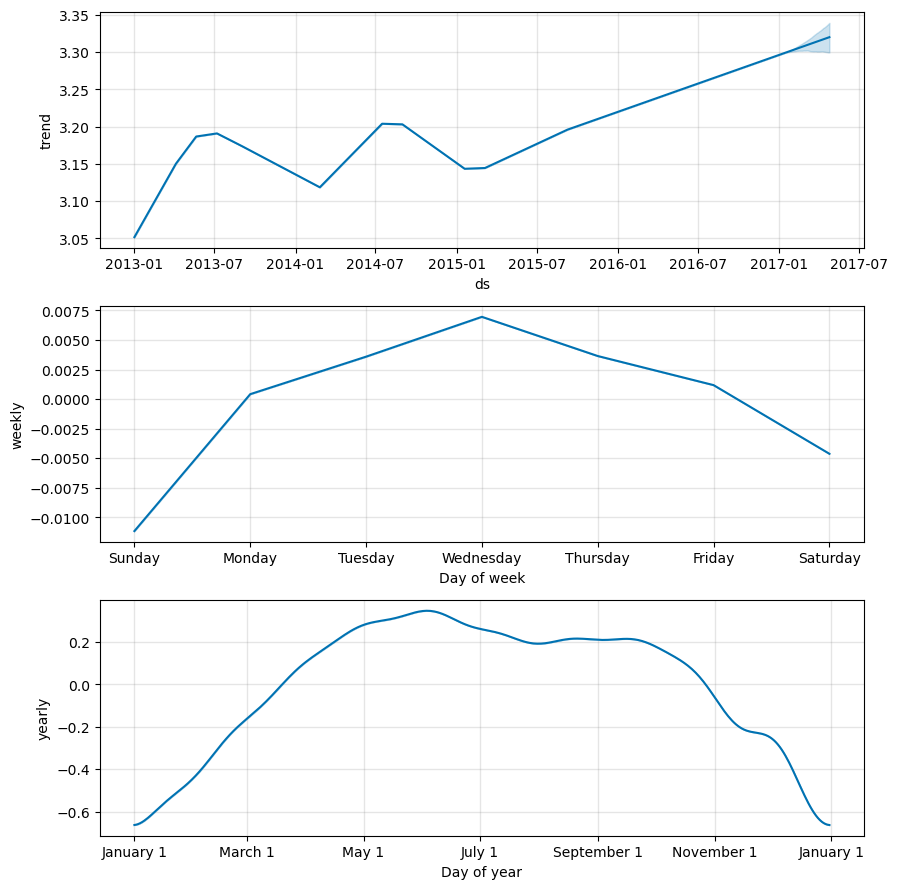

In [18]:
model.plot_components(forecast_data)

In [20]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

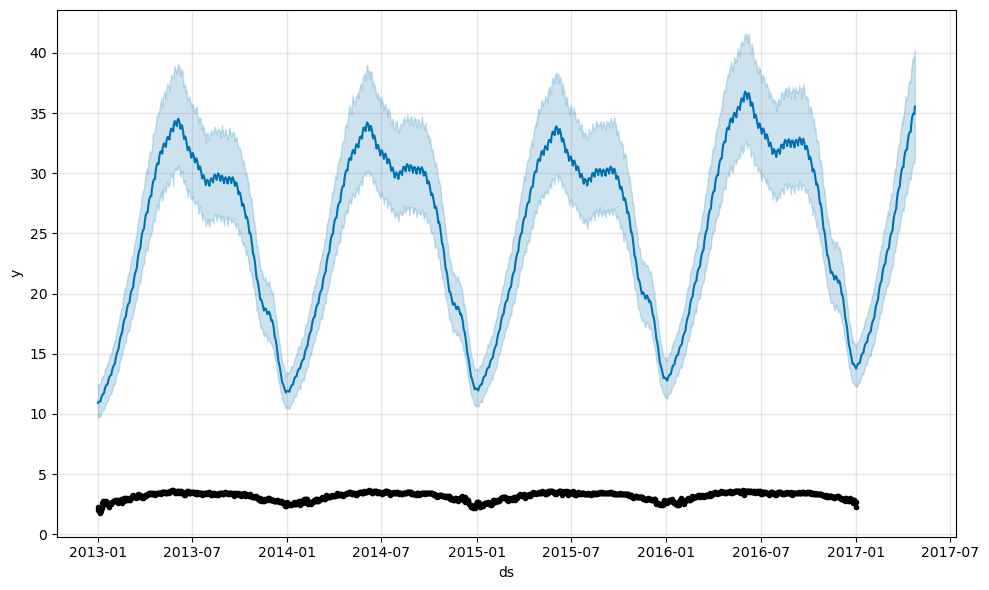

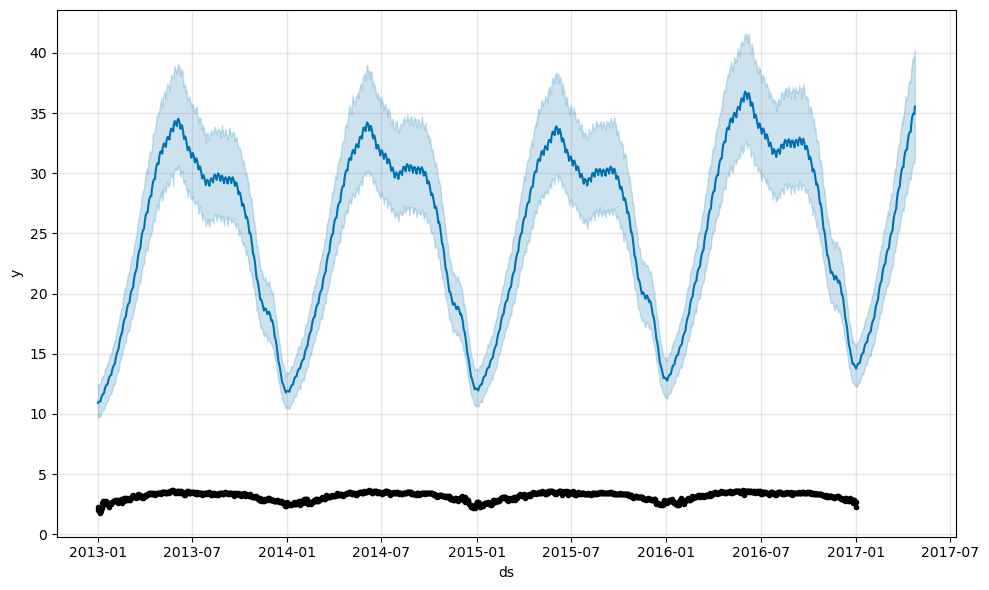

In [21]:
model.plot(forecast_data_orig)

In [22]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [23]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [24]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [25]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-02,3.296627,12.409787,15.917208,3.296627,3.296627,-0.661615,-0.661615,-0.661615,0.000416,0.000416,0.000416,-0.662031,-0.662031,-0.662031,0.0,0.0,0.0,13.943480
1463,2017-01-03,3.296836,12.344704,15.846756,3.296836,3.296836,-0.655583,-0.655583,-0.655583,0.003585,0.003585,0.003585,-0.659168,-0.659168,-0.659168,0.0,0.0,0.0,14.030775
1464,2017-01-04,3.297045,12.428878,15.956328,3.297045,3.297045,-0.648226,-0.648226,-0.648226,0.006954,0.006954,0.006954,-0.655180,-0.655180,-0.655180,0.0,0.0,0.0,14.137336
1465,2017-01-05,3.297255,12.628928,15.988618,3.297255,3.297255,-0.646553,-0.646553,-0.646553,0.003641,0.003641,0.003641,-0.650194,-0.650194,-0.650194,0.0,0.0,0.0,14.163976
1466,2017-01-06,3.297464,12.593546,16.073062,3.297464,3.297464,-0.643161,-0.643161,-0.643161,0.001182,0.001182,0.001182,-0.644343,-0.644343,-0.644343,0.0,0.0,0.0,14.215066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.319220,30.689108,39.250439,3.299740,3.336861,0.231050,0.231050,0.231050,0.003641,0.003641,0.003641,0.227409,0.227409,0.227409,0.0,0.0,0.0,34.822746
1571,2017-04-21,3.319430,30.932620,39.597235,3.299631,3.337451,0.234608,0.234608,0.234608,0.001182,0.001182,0.001182,0.233427,0.233427,0.233427,0.0,0.0,0.0,34.954178
1572,2017-04-22,3.319639,30.891859,39.733799,3.299606,3.338072,0.234675,0.234675,0.234675,-0.004622,-0.004622,-0.004622,0.239298,0.239298,0.239298,0.0,0.0,0.0,34.963831
1573,2017-04-23,3.319848,30.838625,39.570278,3.299581,3.338678,0.233833,0.233833,0.233833,-0.011156,-0.011156,-0.011156,0.244989,0.244989,0.244989,0.0,0.0,0.0,34.941703


In [26]:
rows = final_df["yhat"].tail(113)

In [27]:
rows = rows.reset_index()

In [28]:
rows.pop('index')

0      1462
1      1463
2      1464
3      1465
4      1466
       ... 
108    1570
109    1571
110    1572
111    1573
112    1574
Name: index, Length: 113, dtype: int64

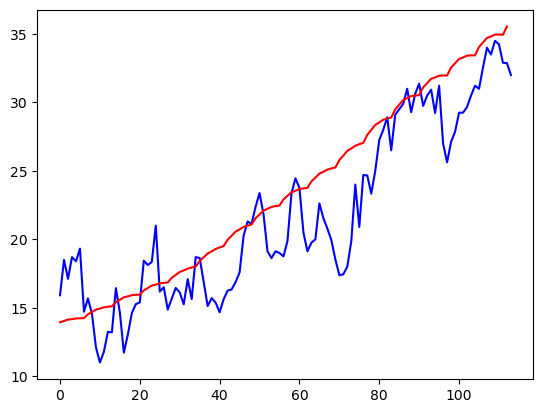

In [29]:
# plot

import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')   
plt.plot(rows, color='red')
plt.show()

# Multi-Variate Forecasting

In [30]:
df_test=pd.read_csv("DailyDelhiClimateTest.csv")
df_train=pd.read_csv("DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [31]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

model_new = Prophet() #instantiate Prophet
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [32]:
model_new.fit(df_train)

''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')

16:31:56 - cmdstanpy - INFO - Chain [1] start processing
16:31:57 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [35]:
df = pd.concat([df, df_test], ignore_index=True)

# Rename columns
df = df.rename(columns={'meantemp': 'y', 'date': 'ds'})

# Select relevant columns for future data
future_data = df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

In [36]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [37]:
forecast_data = model_new.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.042774,2.250158,2.473813,3.042774,3.042774,-0.687669,-0.687669,-0.687669,-0.102568,...,0.009656,0.009656,0.009656,-0.587767,-0.587767,-0.587767,0.0,0.0,0.0,2.355104
1,2013-01-02,3.043831,2.215074,2.429558,3.043831,3.043831,-0.723250,-0.723250,-0.723250,-0.142276,...,0.005426,0.005426,0.005426,-0.584633,-0.584633,-0.584633,0.0,0.0,0.0,2.320581
2,2013-01-03,3.044888,2.228724,2.449792,3.044888,3.044888,-0.702666,-0.702666,-0.702666,-0.120989,...,0.003079,0.003079,0.003079,-0.580226,-0.580226,-0.580226,0.0,0.0,0.0,2.342222
3,2013-01-04,3.045945,2.324320,2.533850,3.045945,3.045945,-0.616490,-0.616490,-0.616490,-0.042078,...,0.007905,0.007905,0.007905,-0.574694,-0.574694,-0.574694,0.0,0.0,0.0,2.429454
4,2013-01-05,3.047002,2.251454,2.468232,3.047002,3.047002,-0.686018,-0.686018,-0.686018,-0.118859,...,0.004404,0.004404,0.004404,-0.568195,-0.568195,-0.568195,0.0,0.0,0.0,2.360983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.308715,3.465988,3.676355,3.293157,3.324918,0.265342,0.265342,0.265342,0.159168,...,0.001760,0.001760,0.001760,0.107624,0.107624,0.107624,0.0,0.0,0.0,3.574057
1572,2017-04-21,3.308915,3.420788,3.636176,3.293075,3.325510,0.213661,0.213661,0.213661,0.101025,...,-0.000228,-0.000228,-0.000228,0.112354,0.112354,0.112354,0.0,0.0,0.0,3.522576
1573,2017-04-22,3.309114,3.403104,3.622210,3.293000,3.325983,0.209391,0.209391,0.209391,0.091065,...,-0.002964,-0.002964,-0.002964,0.117289,0.117289,0.117289,0.0,0.0,0.0,3.518505
1574,2017-04-23,3.309314,3.472474,3.680848,3.292869,3.326433,0.268706,0.268706,0.268706,0.152894,...,-0.004486,-0.004486,-0.004486,0.122379,0.122379,0.122379,0.0,0.0,0.0,3.578020


In [127]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,3.573540,3.462763,3.674489
1572,2017-04-21,3.522061,3.411133,3.637218
1573,2017-04-22,3.518002,3.406389,3.633333
1574,2017-04-23,3.577531,3.472302,3.690157
1575,2017-04-24,3.588423,3.479895,3.700581


In [128]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,humidity,humidity_lower,humidity_upper,meanpressure,meanpressure_lower,meanpressure_upper,weekly,weekly_lower,weekly_upper,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.042938,2.247827,2.458251,3.042938,3.042938,-0.687713,-0.687713,-0.687713,-0.102617,-0.102617,-0.102617,-0.112200,-0.112200,-0.112200,-0.000036,-0.000036,-0.000036,0.002662,0.002662,0.002662,0.009619,0.009619,0.009619,-0.587758,-0.587758,-0.587758,0.0,0.0,0.0,2.355225
1,2013-01-02,3.043962,2.209050,2.431260,3.043962,3.043962,-0.723280,-0.723280,-0.723280,-0.142312,-0.142312,-0.142312,-0.147664,-0.147664,-0.147664,-0.000052,-0.000052,-0.000052,0.003656,0.003656,0.003656,0.005405,0.005405,0.005405,-0.584625,-0.584625,-0.584625,0.0,0.0,0.0,2.320682
2,2013-01-03,3.044986,2.228269,2.448774,3.044986,3.044986,-0.702684,-0.702684,-0.702684,-0.121014,-0.121014,-0.121014,-0.124021,-0.124021,-0.124021,-0.000059,-0.000059,-0.000059,-0.001452,-0.001452,-0.001452,0.003067,0.003067,0.003067,-0.580218,-0.580218,-0.580218,0.0,0.0,0.0,2.342303
3,2013-01-04,3.046010,2.320840,2.540580,3.046010,3.046010,-0.616517,-0.616517,-0.616517,-0.042114,-0.042114,-0.042114,-0.049941,-0.049941,-0.049941,-0.000047,-0.000047,-0.000047,0.000282,0.000282,0.000282,0.007875,0.007875,0.007875,-0.574685,-0.574685,-0.574685,0.0,0.0,0.0,2.429493
4,2013-01-05,3.047034,2.246332,2.468315,3.047034,3.047034,-0.686035,-0.686035,-0.686035,-0.118889,-0.118889,-0.118889,-0.123233,-0.123233,-0.123233,-0.000042,-0.000042,-0.000042,0.001039,0.001039,0.001039,0.004387,0.004387,0.004387,-0.568185,-0.568185,-0.568185,0.0,0.0,0.0,2.360999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.308233,3.462763,3.674489,3.291166,3.323892,0.265308,0.265308,0.265308,0.159177,0.159177,0.159177,0.157326,0.157326,0.157326,0.000098,0.000098,0.000098,-0.001452,-0.001452,-0.001452,0.001753,0.001753,0.001753,0.107583,0.107583,0.107583,0.0,0.0,0.0,3.573540
1572,2017-04-21,3.308431,3.411133,3.637218,3.290989,3.324296,0.213630,0.213630,0.213630,0.101036,0.101036,0.101036,0.101175,0.101175,0.101175,0.000088,0.000088,0.000088,0.000282,0.000282,0.000282,-0.000227,-0.000227,-0.000227,0.112312,0.112312,0.112312,0.0,0.0,0.0,3.522061
1573,2017-04-22,3.308630,3.406389,3.633333,3.290904,3.324687,0.209372,0.209372,0.209372,0.091086,0.091086,0.091086,0.093964,0.093964,0.093964,0.000074,0.000074,0.000074,0.001039,0.001039,0.001039,-0.002952,-0.002952,-0.002952,0.117247,0.117247,0.117247,0.0,0.0,0.0,3.518002
1574,2017-04-23,3.308828,3.472302,3.690157,3.290878,3.325181,0.268703,0.268703,0.268703,0.152928,0.152928,0.152928,0.157326,0.157326,0.157326,0.000070,0.000070,0.000070,-0.006561,-0.006561,-0.006561,-0.004469,-0.004469,-0.004469,0.122337,0.122337,0.122337,0.0,0.0,0.0,3.577531


C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



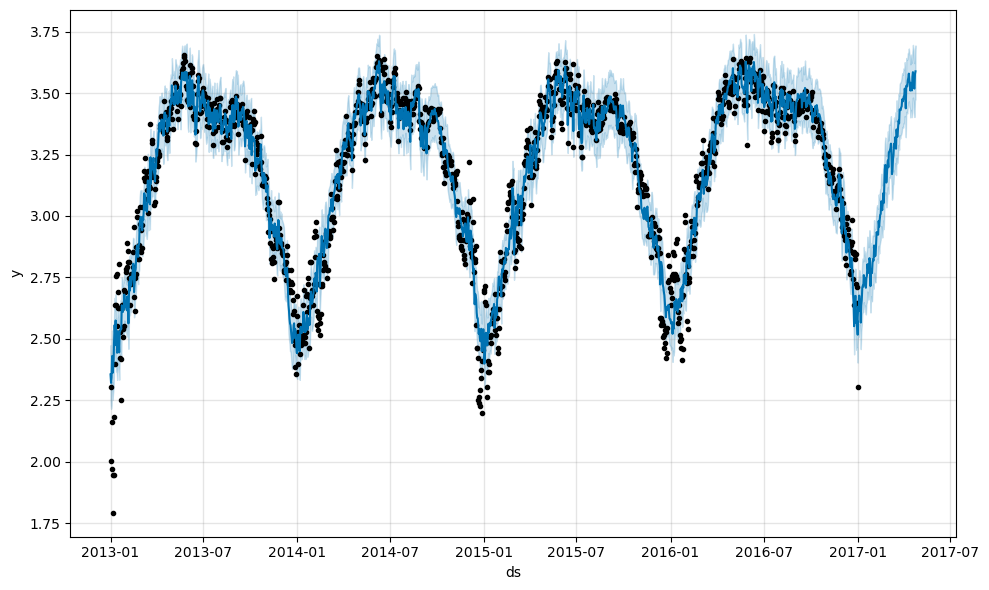

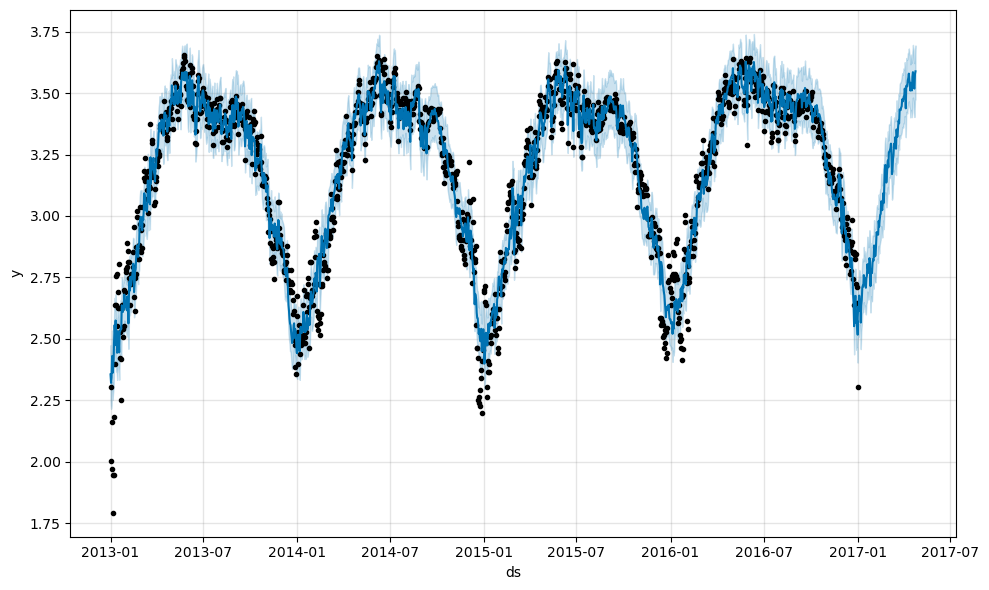

In [38]:
model_new.plot(forecast_data)

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The

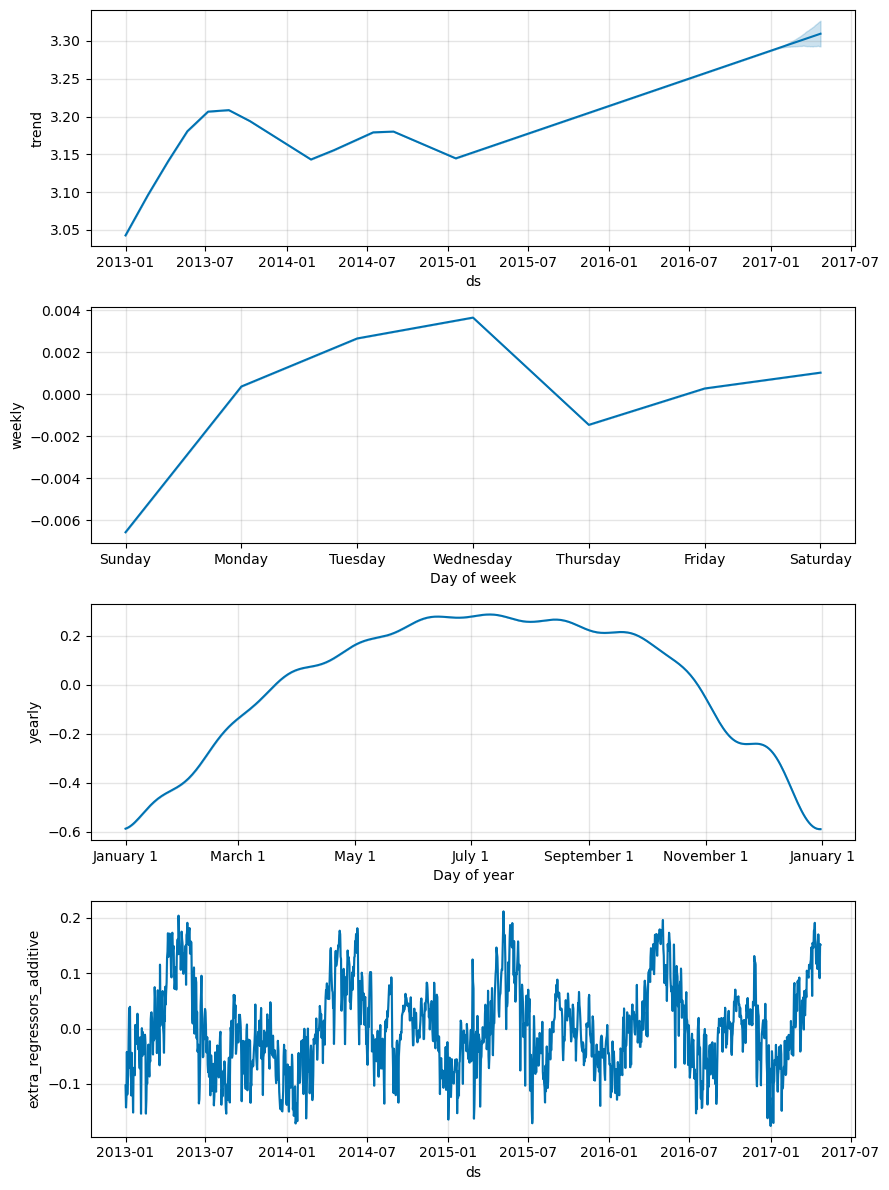

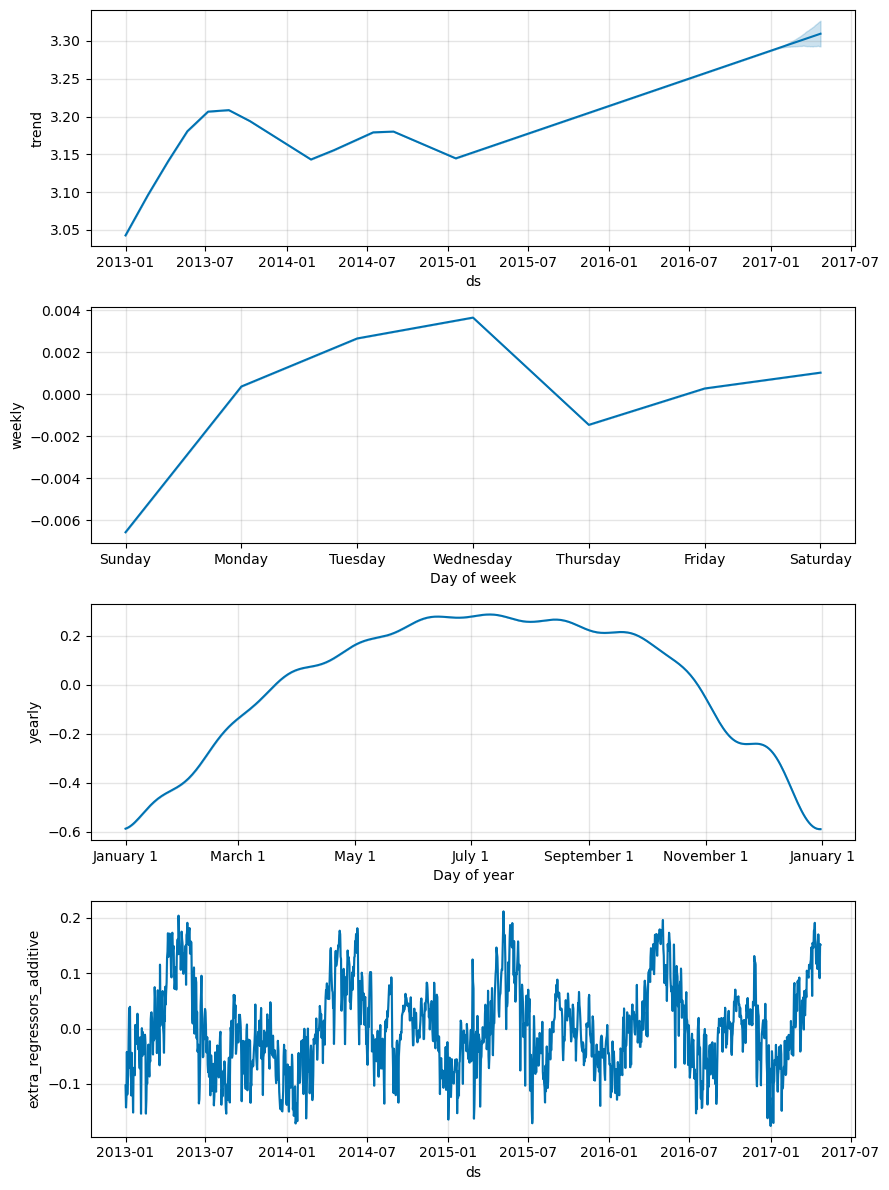

In [39]:
model_new.plot_components(forecast_data)

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Arun\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



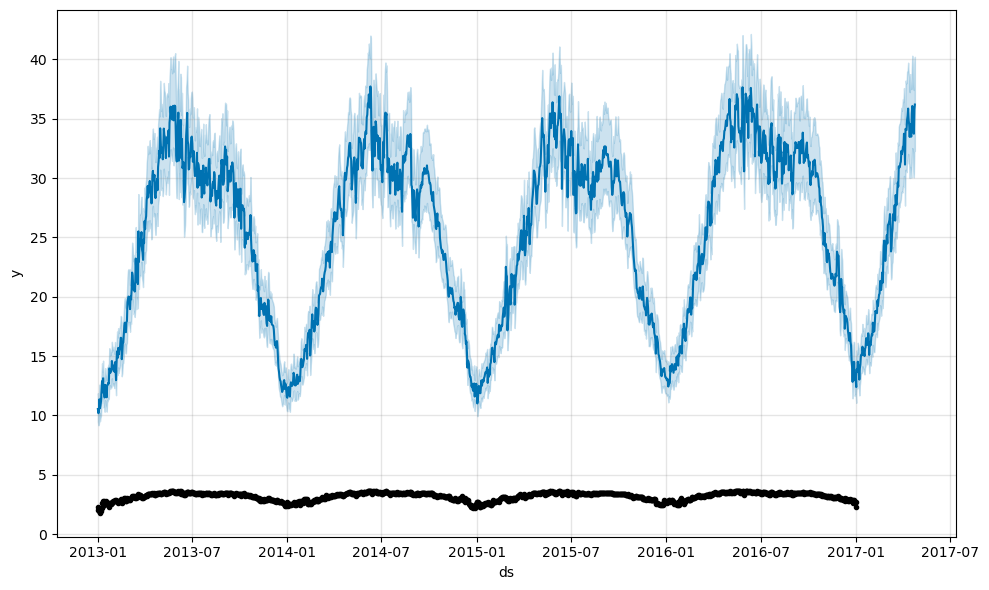

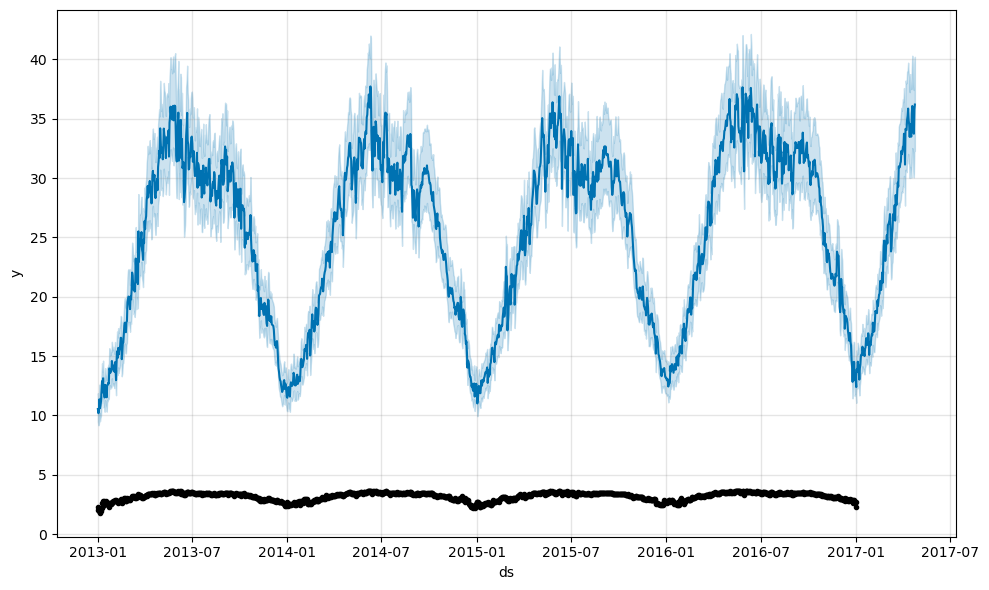

In [40]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [41]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [42]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'